In [1]:
%matplotlib inline
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

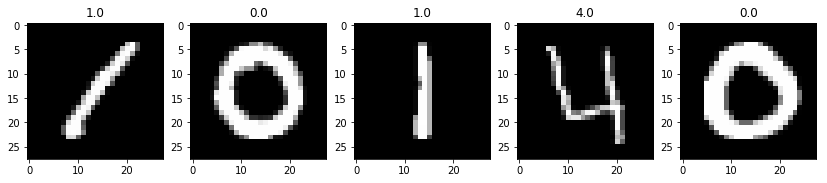

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [112]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

## Собираем сверточную сеть для обучения

In [113]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(6, 
                              kernel_size=(5, 5), 
                              padding='same', 
                              activation='relu', 
                              input_shape=x_train.shape[1:]))

model.add(keras.layers.Conv2D(6, 
                              kernel_size=(5, 5), 
                              padding='same', 
                              activation='relu', 
                              input_shape=x_train.shape[1:]))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))


model.add(keras.layers.Conv2D(16, 
                              kernel_size=(5, 5),
                              padding='valid',
                              activation='relu'))
model.add(keras.layers.Conv2D(16, 
                              kernel_size=(5, 5),
                              padding='valid',
                              activation='relu'))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Выводим информацию о модели

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 6)         906       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 6, 6, 16)          6416      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 144)               0         
__________

## One hot encoding разметки

In [115]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)

## Запускаем обучение

In [116]:
model.fit(x_train, y_train_labels, batch_size=32, epochs=10, validation_split=0.2)

Train on 26880 samples, validate on 6720 samples
Epoch 1/10
26880/26880 [==============================] - 7s - loss: 0.5403 - acc: 0.8785 - val_loss: 0.1397 - val_acc: 0.9597
Epoch 2/10
26880/26880 [==============================] - 7s - loss: 0.1015 - acc: 0.9676 - val_loss: 0.1057 - val_acc: 0.9682
Epoch 3/10
26880/26880 [==============================] - 6s - loss: 0.0780 - acc: 0.9751 - val_loss: 0.0845 - val_acc: 0.9759
Epoch 4/10
26880/26880 [==============================] - 7s - loss: 0.0599 - acc: 0.9804 - val_loss: 0.0920 - val_acc: 0.9731
Epoch 5/10
26880/26880 [==============================] - 6s - loss: 0.0559 - acc: 0.9817 - val_loss: 0.0837 - val_acc: 0.9759
Epoch 6/10
26880/26880 [==============================] - 7s - loss: 0.0452 - acc: 0.9853 - val_loss: 0.0852 - val_acc: 0.9766
Epoch 7/10
26880/26880 [==============================] - 6s - loss: 0.0448 - acc: 0.9859 - val_loss: 0.0845 - val_acc: 0.9762
Epoch 8/10
26880/26880 [==============================] - 6s -

## Предсказываем класс объекта

In [117]:
pred_val = model.predict_classes(x_val)

8352/8400 [============================>.] - ETA: 0s

## Оцениваем качество решение на валидационной выборке

In [118]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.982380952381


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99       816
        1.0       0.99      0.98      0.99       909
        2.0       0.98      0.98      0.98       846
        3.0       0.98      0.99      0.98       937
        4.0       0.98      0.98      0.98       839
        5.0       0.97      0.98      0.98       702
        6.0       1.00      0.98      0.99       785
        7.0       0.98      0.98      0.98       893
        8.0       0.98      0.97      0.98       835
        9.0       0.96      0.99      0.98       838

avg / total       0.98      0.98      0.98      8400



In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[808   0   1   0   2   0   2   0   1   2]
 [  0 894   2   1   1   1   1   3   3   3]
 [  2   2 833   2   1   0   0   3   2   1]
 [  0   0   0 928   0   3   0   2   3   1]
 [  1   1   1   1 821   0   0   2   0  12]
 [  1   0   0   9   0 691   0   0   1   0]
 [  4   1   1   0   3   8 766   0   2   0]
 [  0   1   9   2   1   0   0 872   1   7]
 [  1   0   5   4   2   5   0   1 813   4]
 [  0   0   1   1   3   3   0   3   1 826]]


## Предсказания на тестовыйх данных

In [121]:
pred_test = model.predict_classes(test_img)

27872/28000 [============================>.] - ETA: 0s

## Визуализируем предсказания

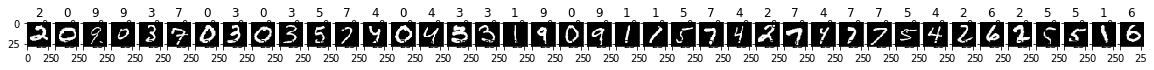

In [122]:
digits_to_show = 40
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:digits_to_show], 1):
    subplot = fig.add_subplot(1, digits_to_show, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [123]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [125]:
# Your submission scored 0.97871

In [19]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16020385733775530684
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 146774425
locality {
  bus_id: 1
}
incarnation: 874977925322444746
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:20:00.0"
]
